In [701]:
#Add some varibles to represent column names.

RK = 'Rk'
PLAYER = 'Player'
POS = 'Pos'
AGE = 'Age'
TM = 'Tm'
G = 'G'
GS = 'GS'
MP = 'MP'
FG = 'FG'
FGA = 'FGA'
FG_P = 'FG%'
THREE_P = '3P'
THREE_PA = '3PA'
THREE_P_P = '3P%'
TWO_P = '2P'
TWO_PA = '2PA'
TWO_P_P = '2P%'
EFG_P = 'eFG%'
FT = 'FT'
FTA = 'FTA'
FT_P = 'FT%'
ORB = 'ORB'
DRB = 'DRB'
TRB = 'TRB'
AST = 'AST'
STL = 'STL'
BLK = 'BLK'
TOV = 'TOV'
PF = 'PF'
PTS = 'PTS'
SEASON = 'Season'
PID = 'Player ID'
WINS = 'Wins'

#hard code wins 



WIN_DICT = {
    'TOR_22' : 48,
    'MEM_22' : 56,
    'MIA_22' : 53,
    'BRK_22' : 44,
    'NOP_22' : 36,
    'UTA_22' : 49,
    'MIL_22' : 51,
    'CLE_22' : 44,
    'IND_22' : 24,
    'LAL_22' : 33,
    'ORL_22' : 22,
    'NYK_22' : 37,
    'HOU_22' : 20,
    'WAS_22' : 35,
    'PHO_22' : 64,
    'SAC_22' : 30,
    'DET_22' : 23,
    'CHO_22' : 43,
    'CHI_22' : 46,
    'ATL_22' : 43,
    'DEN_22' : 48,
    'PHI_22' : 51,
    'SAS_22' : 34,
    'LAC_22' : 42,
    'OKC_22' : 24,
    'MIN_22' : 46,
    'DAL_22' : 52,
    'GSW_22' : 53,
    'POR_22' : 27,
    'BOS_22' : 51,
    'TOR_23' : 41,
    'MEM_23' : 51,
    'MIA_23' : 44,
    'BRK_23' : 45,
    'NOP_23' : 42,
    'UTA_23' : 37,
    'MIL_23' : 58,
    'CLE_23' : 51,
    'IND_23' : 35,
    'LAL_23' : 43,
    'ORL_23' : 34,
    'NYK_23' : 47,
    'HOU_23' : 22,
    'WAS_23' : 35,
    'PHO_23' : 45,
    'SAC_23' : 48,
    'DET_23' : 17,
    'CHO_23' : 27,
    'CHI_23' : 40,
    'ATL_23' : 41,
    'DEN_23' : 53,
    'PHI_23' : 54,
    'SAS_23' : 22,
    'LAC_23' : 44,
    'OKC_23' : 40,
    'MIN_23' : 42,
    'DAL_23' : 38,
    'GSW_23' : 44,
    'POR_23' : 33,
    'BOS_23' : 57,
}




In [702]:
# read files ad do some preliminary cleaning

import pandas as pd
import numpy as np

# Get data from season 22
reg_22 = pd.read_csv('21-22-reg.csv', encoding = 'mac_roman',delimiter=';')

# Get data from season 23
reg_23 = pd.read_csv('22-23-reg.csv', encoding = 'mac_roman',delimiter=';')

# print(reg_22.shape, reg_23.shape)

# Clean player column to be a unique ID byt lavelling with seasion & playoff/ reg

reg_22[PID] = reg_22[PLAYER].astype(str) + "_" + reg_22[TM].astype(str) + "_22"

reg_23[PID] = reg_23[PLAYER].astype(str) + "_" + reg_23[TM].astype(str) + "_23"

reg_22[TM] += "_22"
reg_23[TM] += "_23"



reg_22[SEASON] = "22"
# playoff_22['Season'] = "22_P"
reg_23[SEASON] = "23"
# playoff_23['Season'] = "23_P"
# reg_24['Season'] = "24_R"


#Combine to one data frame

combined_stats = pd.concat([reg_22, reg_23])

# print(combined_stats.dtypes)

combined_stats[PLAYER] = combined_stats[PLAYER].astype('string')
combined_stats[POS] = combined_stats[POS].astype('string')
combined_stats[TM] = combined_stats[TM].astype('string')
combined_stats[PID] = combined_stats[PID].astype('string')
combined_stats[SEASON] = combined_stats[SEASON].astype('string')

combined_stats[WINS] = 0

print(combined_stats.dtypes)


Rk                    int64
Player       string[python]
Pos          string[python]
Age                   int64
Tm           string[python]
G                     int64
GS                    int64
MP                  float64
FG                  float64
FGA                 float64
FG%                 float64
3P                  float64
3PA                 float64
3P%                 float64
2P                  float64
2PA                 float64
2P%                 float64
eFG%                float64
FT                  float64
FTA                 float64
FT%                 float64
ORB                 float64
DRB                 float64
TRB                 float64
AST                 float64
STL                 float64
BLK                 float64
TOV                 float64
PF                  float64
PTS                 float64
Player ID    string[python]
Season       string[python]
Wins                  int64
dtype: object


In [703]:

#Column  no longer required
# combined_stats.drop(RK,axis=1, inplace=True)

#Remove total rows. These rows indicate players who were traded mid season and are not mapped to a team.
combined_stats = combined_stats[~combined_stats[TM].str.contains('TOT')]

#Reset index
# combined_stats.reset_index(inplace=True)


print(combined_stats.tail(20))



combined_stats.to_csv('22_23_PlayerStats',index=False, encoding='mac_roman',sep=';')


      Rk              Player Pos  Age      Tm   G  GS    MP   FG   FGA  ...  \
658  521    Kenrich Williams  PF   28  OKC_23  53  10  22.8  3.4   6.5  ...   
659  522       Mark Williams   C   21  CHO_23  43  17  19.3  3.7   5.8  ...   
660  523    Patrick Williams  PF   21  CHI_23  82  65  28.3  3.8   8.3  ...   
661  524     Robert Williams   C   25  BOS_23  35  20  23.5  3.6   4.9  ...   
662  525  Vince Williams Jr.  SG   22  MEM_23  15   1   7.0  0.8   2.7  ...   
663  526     Ziaire Williams  SF   21  MEM_23  37   4  15.2  2.3   5.3  ...   
664  527     Zion Williamson  PF   22  NOP_23  29  29  33.0  9.8  16.2  ...   
665  528       Dylan Windler  SF   26  CLE_23   3   0   3.3  0.7   1.0  ...   
666  529     Justise Winslow  SF   26  POR_23  29  11  26.8  2.8   6.8  ...   
668  530       James Wiseman   C   21  GSW_23  21   0  12.5  2.8   4.5  ...   
669  530       James Wiseman   C   21  DET_23  24  22  25.2  5.4  10.2  ...   
670  531      Christian Wood   C   27  DAL_23  67  1

In [706]:
print(combined_stats.columns)

#Column  no longer required
combined_stats.drop(RK,axis=1, inplace=True)


#Remove total rows. These rows indicate players who were traded mid season and are not mapped to a team.
combined_stats = combined_stats[~combined_stats[TM].str.contains('TOT')]

#Reset index
combined_stats.reset_index(inplace=True)


print(combined_stats.tail(20))




Index(['index', 'Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'Player ID', 'Season', 'Wins'],
      dtype='object')
      level_0  index              Player Pos  Age      Tm   G  GS    MP   FG  \
1304     1304    658    Kenrich Williams  PF   28  OKC_23  53  10  22.8  3.4   
1305     1305    659       Mark Williams   C   21  CHO_23  43  17  19.3  3.7   
1306     1306    660    Patrick Williams  PF   21  CHI_23  82  65  28.3  3.8   
1307     1307    661     Robert Williams   C   25  BOS_23  35  20  23.5  3.6   
1308     1308    662  Vince Williams Jr.  SG   22  MEM_23  15   1   7.0  0.8   
1309     1309    663     Ziaire Williams  SF   21  MEM_23  37   4  15.2  2.3   
1310     1310    664     Zion Williamson  PF   22  NOP_23  29  29  33.0  9.8   
1311     1311    665       Dylan Windler  SF   26  CLE_23   3   0 

In [707]:
# Add the wins columns.

combined_stats[WINS] = combined_stats[TM].map(WIN_DICT)

print(combined_stats.tail(20))


      level_0  index              Player Pos  Age      Tm   G  GS    MP   FG  \
1304     1304    658    Kenrich Williams  PF   28  OKC_23  53  10  22.8  3.4   
1305     1305    659       Mark Williams   C   21  CHO_23  43  17  19.3  3.7   
1306     1306    660    Patrick Williams  PF   21  CHI_23  82  65  28.3  3.8   
1307     1307    661     Robert Williams   C   25  BOS_23  35  20  23.5  3.6   
1308     1308    662  Vince Williams Jr.  SG   22  MEM_23  15   1   7.0  0.8   
1309     1309    663     Ziaire Williams  SF   21  MEM_23  37   4  15.2  2.3   
1310     1310    664     Zion Williamson  PF   22  NOP_23  29  29  33.0  9.8   
1311     1311    665       Dylan Windler  SF   26  CLE_23   3   0   3.3  0.7   
1312     1312    666     Justise Winslow  SF   26  POR_23  29  11  26.8  2.8   
1313     1313    668       James Wiseman   C   21  GSW_23  21   0  12.5  2.8   
1314     1314    669       James Wiseman   C   21  DET_23  24  22  25.2  5.4   
1315     1315    670      Christian Wood

In [708]:
combined_stats.to_csv('22_23_PlayerStats',index=False, encoding='mac_roman',sep=';')

Validate data

In [709]:
def validate_not_null(df):
    if df.isnull().sum().sum() > 0:
        print("Dataframe contains missing values")
        print(df.isnull().sum())
  

def validate_duplicate(df):
    if df.duplicated().sum() > 0:
        print("DataFrame contains duplicate rows")
 

def validate_range(df):
    for i in df.select_dtypes(include=[np.number]).columns:
        if (df[i] < 0).any() and (df[i] > 80).any() :
            print("Data frame containes negative value or large outlier")
   

def validate_unique(df, col):
    duplicates = df[col].duplicated()
    for i in range(0,len(duplicates)):
        if duplicates[i]:
            print(df[col][i], df[TM][i])



def validate(df):
    validate_not_null(df)
    validate_duplicate(df)
    validate_range(df)
    validate_unique(df, PID) # PLayer should be unique for each list.




validate(combined_stats)

print(combined_stats[TM].unique())
print(combined_stats[POS].unique())


<StringArray>
['TOR_22', 'MEM_22', 'MIA_22', 'BRK_22', 'NOP_22', 'UTA_22', 'MIL_22',
 'CLE_22', 'IND_22', 'LAL_22', 'ORL_22', 'NYK_22', 'HOU_22', 'WAS_22',
 'PHO_22', 'SAC_22', 'DET_22', 'CHO_22', 'CHI_22', 'ATL_22', 'DEN_22',
 'PHI_22', 'SAS_22', 'LAC_22', 'OKC_22', 'MIN_22', 'DAL_22', 'GSW_22',
 'POR_22', 'BOS_22', 'TOR_23', 'MEM_23', 'MIA_23', 'UTA_23', 'MIN_23',
 'MIL_23', 'CLE_23', 'NOP_23', 'ORL_23', 'NYK_23', 'POR_23', 'WAS_23',
 'PHO_23', 'DET_23', 'GSW_23', 'CHO_23', 'LAL_23', 'SAS_23', 'SAC_23',
 'LAC_23', 'OKC_23', 'DAL_23', 'CHI_23', 'ATL_23', 'IND_23', 'DEN_23',
 'BRK_23', 'BOS_23', 'PHI_23', 'HOU_23']
Length: 60, dtype: string
<StringArray>
['C', 'PF', 'SG', 'PG', 'SF']
Length: 5, dtype: string


In [710]:
print(combined_stats.shape)


(1324, 34)


R: 0.039892193358324154 P: 0.40819705295085784 std error 0.055251653616370806


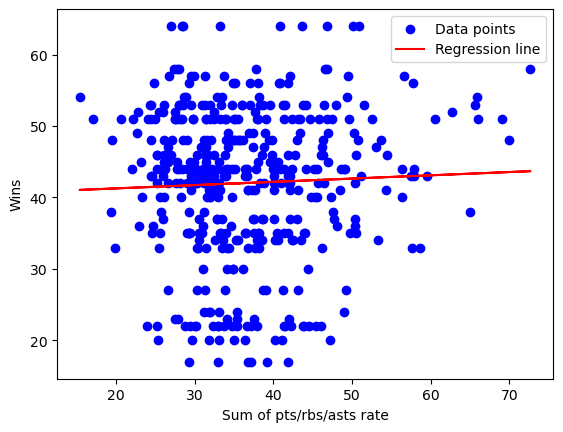

In [721]:
#Analysis linear reagression using average pts / assits / rebounds acocunting for rate

import scipy.stats as stats
import matplotlib.pyplot as plt


cs = combined_stats

cs = cs[(cs[G] >= 55) & (cs[MP] > 15)]

x = (cs[PTS] + cs[TRB] + cs[AST]) * 48 / cs[MP] 
y = cs[WINS]


slope, intercept, r, p, std_err = stats.linregress(x,y)

print("R: "+ str(r),"P: " + str( p),"std error " + str(std_err))

regression = slope * x + intercept

plt.scatter(x, y, color='blue', label='Data points')  # Original data points
plt.plot(x, regression, color='red', label='Regression line') 
plt.xlabel('Sum of pts/rbs/asts rate')
plt.ylabel('Wins')
plt.legend()
plt.show()


R: 0.04946116524608708 P: 0.30504230467430193 std error 0.07990815295849238


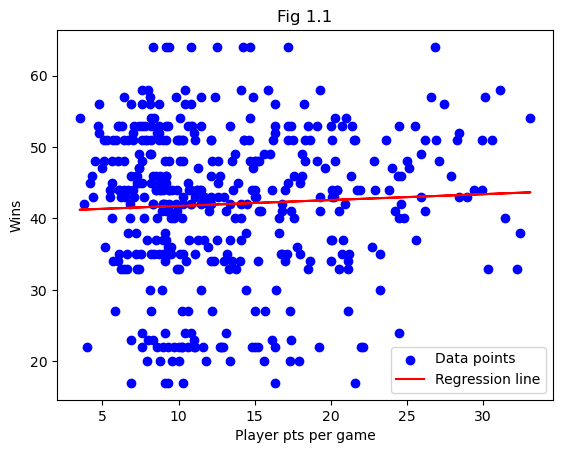

In [722]:
# Pts to wins



x = (cs[PTS])
y = cs[WINS]


slope, intercept, r, p, std_err = stats.linregress(x,y)

print("R: "+ str(r),"P: " + str( p),"std error " + str(std_err))

regression = slope * x + intercept

plt.scatter(x, y, color='blue', label='Data points')  # Original data points
plt.plot(x, regression, color='red', label='Regression line') 
plt.xlabel('Player pts per game')
plt.ylabel('Wins')
plt.title('Fig 1.1')
plt.legend()
plt.show()


R: 0.04946116524608708 P: 0.30504230467430193 std error 0.07990815295849238


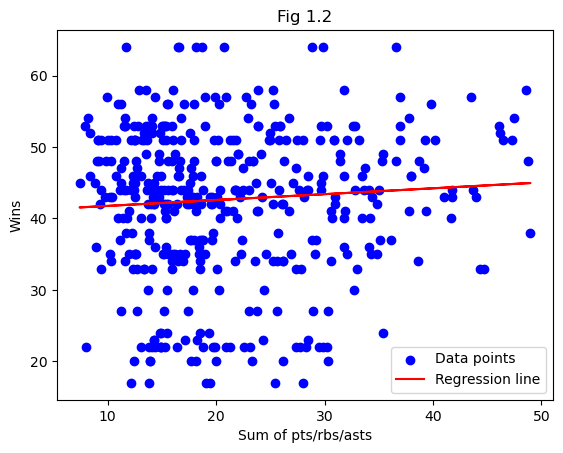

In [723]:
#Analysis only pts assists rebounds

cs = combined_stats

cs = cs[(cs[G] >= 55) & (cs[MP] > 15)] 

x = (cs[PTS] + cs[TRB] + cs[AST])
y = cs[WINS]


print("R: "+ str(r),"P: " + str( p),"std error " + str(std_err))


regression = slope * x + intercept

plt.scatter(x, y, color='blue', label='Data points')  # Original data points
plt.plot(x, regression, color='red', label='Regression line') 
plt.xlabel('Sum of pts/rbs/asts')
plt.ylabel('Wins')
plt.title('Fig 1.2')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


R: 0.04946116524608708 P: 0.30504230467430193 std error 0.07990815295849238


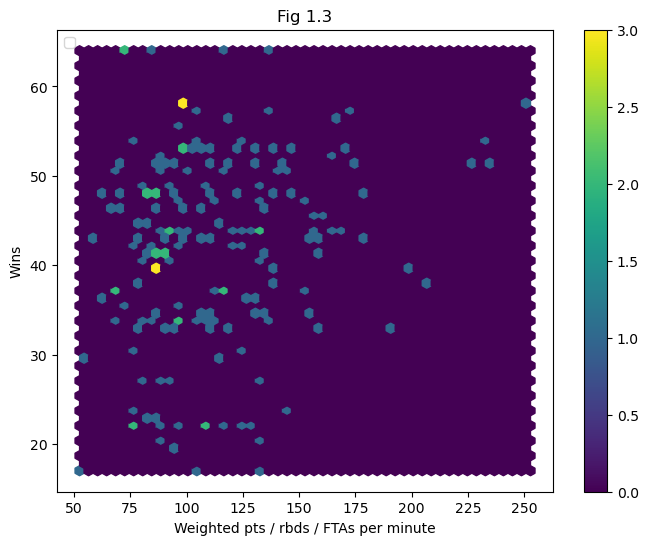

In [724]:
#Analysis ousing pts ./ rat and total rebounds acouining for minutes played
cs = combined_stats

cs = cs[(cs[G] >= 55) & (cs[MP] > 10) & (cs[FGA] > 10)] 
FT_weight = 7

Sht_weight = 4

x = (cs[PTS] * cs[EFG_P] * Sht_weight + cs[TRB] + FT_weight * cs[FTA]) * 48 /cs[MP]
y = cs[WINS]


print("R: "+ str(r),"P: " + str( p),"std error " + str(std_err))


regression = slope * x + intercept

# plt.scatter(x, y, color='blue', label='Data points')  # Original data points
plt.figure(figsize=(8,6))
hb = plt.hexbin(x, y, gridsize=50) 
plt.colorbar(hb)
plt.xlabel('Weighted pts / rbds / FTAs per minute')
plt.ylabel('Wins')
plt.title('Fig 1.3')
plt.legend()
plt.show()


#Analysis
Teams = {
    'TOR': 0,
    'MEM': 107,
    'MIA': 97,
    'BRK': 89,
    'NOP': 78,
    'UTA': 86,
    'MIL': 109,
    'CLE': 95,
    'IND': 60,
    'LAL': 76,
    'ORL': 56,
    'NYK': 84,
    'HOU': 42,
    'WAS': 70,
    'PHO': 109,
    'SAC': 78,
    'DET': 40,
    'CHO': 70,
    'CHI': 86,
    'ATL': 84,
    'DEN': 101,
    'PHI': 105,
    'SAS': 52,
    'LAC': 86,
    'OKC': 64,
    'MIN': 90,
    'DAL': 90,
    'GSW': 97,
    'POR': 60,
    'BOS': 0
}

cs = cs[(cs[G] >= 50) & (cs[MP] > 20)]

cs['SUM'] = (cs[PTS] + cs[TRB]) * 48 / cs[MP]

x = cs.groupby(TM)[['SUM']].mean().reset_index()


x = np.array(x['SUM'])

y = np.array([*WIN_DICT.values()])


print(y)

slope, intercept, r, p, std_err = stats.linregress(x,y)

print(r, p, std_err)

regression = slope * x + intercept

# plt.scatter(x, y, color='blue', label='Data points')  # Original data points
plt.figure(figsize=(8,6))
plt.plot(x, regression, color='red', label='Regression line') 
plt.xlabel('X')
plt.ylabel('Wins')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009907665598378836 0.7187150080353791 0.028495493098479586


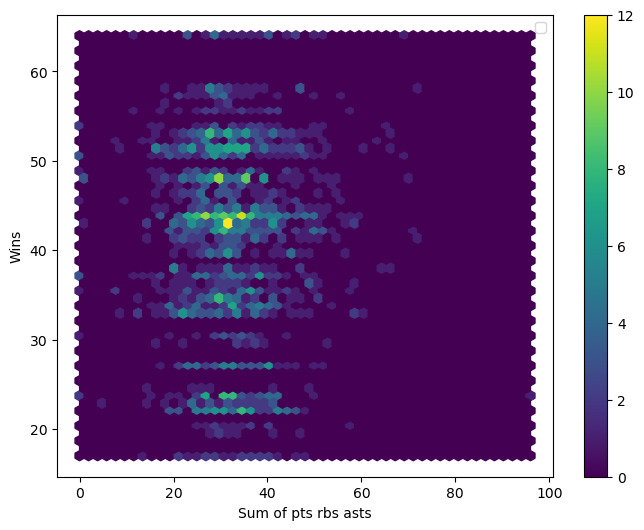

In [726]:
#Analysis

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


cs = combined_stats

# cs = cs[(cs[G] >= 55) & (cs[MP] > 15)] # Filter for Only players who played over a certain amount of games and minutes played per game

x = (cs[PTS] + cs[TRB] + cs[AST]) * 48 / cs[MP] 

y = cs[WINS]


slope, intercept, r, p, std_err = stats.linregress(x,y)

print(r, p, std_err)

regression = slope * x + intercept

plt.figure(figsize=(8,6))  
hb = plt.hexbin(x,y,gridsize=50)
plt.colorbar(hb)
# plt.plot(x, regression, color='red', label='Regression line') 
plt.xlabel('Sum of pts rbs asts')
plt.ylabel('Wins')
plt.legend()
plt.show()


In [ ]:

p